In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # visualize satellite images
from skimage.io import imshow # visualize satellite images

from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout # components of network
from keras.models import Sequential # type of model

Using TensorFlow backend.


In [2]:
x_train_set_fpath = './input/X_test_sat4.csv'
y_train_set_fpath = './input/y_test_sat4.csv'
print ('Loading Training Data')
X_train = pd.read_csv(x_train_set_fpath)
print ('Loaded 28 X 28 X 4 images')
Y_train = pd.read_csv(y_train_set_fpath)
print ('Loaded labels')

Loading Training Data
Loaded 28 X 28 X 4 images
Loaded labels


In [4]:
X_train = X_train.as_matrix()
Y_train = Y_train.as_matrix()
print ('We have',X_train.shape[0],'examples and each example is a list of',X_train.shape[1],'numbers with',Y_train.shape[1],'possible classifications.')

We have 99999 examples and each example is a list of 3136 numbers with 4 possible classifications.


/Users/minsiklee/.nbimgclass/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.
/Users/minsiklee/.nbimgclass/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [5]:
X_train_img = X_train.reshape([99999,28,28,4]).astype(float)
print (X_train_img.shape)

(99999, 28, 28, 4)


/Users/minsiklee/.nbimgclass/lib/python3.6/site-packages/skimage/io/_plugins/matplotlib_plugin.py:78: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  warn("Float image out of standard range; displaying "
W0819 13:53:20.834687 4712633792 image.py:700] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


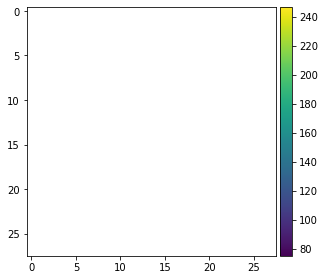

Barren Land


In [6]:
ix = 5#Type a number between 0 and 99,999 inclusive
imshow(np.squeeze(X_train_img[ix,:,:,0:3]).astype(float)) #Only seeing the RGB channels
plt.show()
#Tells what the image is
if Y_train[ix,0] == 1:
    print ('Barren Land')
elif Y_train[ix,1] == 1:
    print ('Trees')
elif Y_train[ix,2] == 1:
    print ('Grassland')
else:
    print ('Other')

In [7]:
model = Sequential([
    Dense(4, input_shape=(3136,), activation='softmax')
])

W0819 13:53:26.743588 4712633792 deprecation_wrapper.py:119] From /Users/minsiklee/.nbimgclass/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0819 13:53:26.760523 4712633792 deprecation_wrapper.py:119] From /Users/minsiklee/.nbimgclass/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0819 13:53:26.763684 4712633792 deprecation_wrapper.py:119] From /Users/minsiklee/.nbimgclass/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



In [8]:
X_train = X_train/255

In [11]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()
model.fit(X_train,Y_train,batch_size=32, epochs=5, verbose=1, validation_split=0.01)

W0819 02:07:42.575887 4597757376 deprecation_wrapper.py:119] From /Users/minsiklee/.satellite/lib/python3.7/site-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0819 02:07:42.623973 4597757376 deprecation_wrapper.py:119] From /Users/minsiklee/.satellite/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.

W0819 02:07:42.739035 4597757376 deprecation.py:323] From /Users/minsiklee/.satellite/lib/python3.7/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0819 02:07:42.777674 4597757376 deprecation_wrapper.py:119] From /Users/minsiklee/.satellite/lib/python3.7/site-packages/keras/backend/tensorflow_back

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 4)                 12548     
Total params: 12,548
Trainable params: 12,548
Non-trainable params: 0
_________________________________________________________________
Train on 98999 samples, validate on 1000 samples
Epoch 1/5
98999/98999 [==============================] - 23s 229us/step - loss: 0.7557 - acc: 0.6864 - val_loss: 0.6255 - val_acc: 0.7600
Epoch 2/5
98999/98999 [==============================] - 21s 210us/step - loss: 0.6731 - acc: 0.7201 - val_loss: 0.6206 - val_acc: 0.7420
Epoch 3/5
98999/98999 [==============================] - 20s 201us/step - loss: 0.6579 - acc: 0.7247 - val_loss: 0.6258 - val_acc: 0.7250
Epoch 4/5
98999/98999 [==============================] - 20s 200us/step - loss: 0.6493 - acc: 0.7270 - val_loss: 0.6255 - val_acc: 0.7670
Epoch 5/5
98999/98999 [==============================] - 19s 191u

In [9]:
preds = model.predict(X_train[-1000:], verbose=1)

W0819 13:54:01.041172 4712633792 deprecation_wrapper.py:119] From /Users/minsiklee/.nbimgclass/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:2741: The name tf.Session is deprecated. Please use tf.compat.v1.Session instead.

W0819 13:54:01.050906 4712633792 deprecation_wrapper.py:119] From /Users/minsiklee/.nbimgclass/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.



1000/1000 [==============================] - 0s 140us/step


W0819 13:54:07.652687 4712633792 image.py:700] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


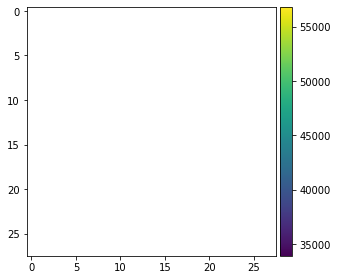

Prediction:
2.5% probability barren land,
8.8% probability trees,
84.5% probability grassland,
4.1% probability other

Ground Truth: Barren Land


In [10]:
ix = 8 #Type a number between 0 and 999 inclusive
imshow(np.squeeze(X_train_img[99999-(1000-ix),:,:,0:3]).astype(float)*255) #Only seeing the RGB channels
plt.show()
#Tells what the image is
print ('Prediction:\n{:.1f}% probability barren land,\n{:.1f}% probability trees,\n{:.1f}% probability grassland,\n{:.1f}% probability other\n'.format(preds[ix,0]*100,preds[ix,1]*100,preds[ix,2]*100,preds[ix,3]*100))

print ('Ground Truth: ',end='')
if Y_train[99999-(1000-ix),0] == 1:
    print ('Barren Land')
elif Y_train[99999-(1000-ix),1] == 1:
    print ('Trees')
elif Y_train[99999-(1000-ix),2] == 1:
    print ('Grassland')
else:
    print ('Other')